# Практическое задание 2
## Вариант 7
## Задание 1 

Рассмотрим данные:

|       | x<sub>1</sub> | x<sub>2</sub> | x<sub>3</sub> | x<sub>4</sub> | x<sub>5</sub> | x<sub>6</sub> | x<sub>7</sub> | x<sub>8</sub> |
| :---: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: |
| **A** |      1.9       |      2.9       |      1.4       |      -1.4       |      2      |      -1.4      |      -2.9      |      2      |
| **B** |      -5       |      -6.4       |      -1.5       |      -1.3       |      -6.3      |      -0.4      |      -3.1      |      -5.8      |

Есть ядро (функция сходства):
$$
K({\bf x}_i,{\bf x}_j)=||{\bf x}_i-{\bf x}_j||^2\\
$$

1. Построить диаграмму рассеяния точек **x<sub>i</sub>** (оси подписать, пронумеровать точки)

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

In [2]:

A=np.array([4.4,3.6,2.7,10.3,8,9,3.1,8.3])
B=np.array([4.8,3.6,6.3,4.9,3.2,4.2,4.9,4.4])
matrix = np.transpose([A,B])
C=[1,2,3,4,5,6,7,8]

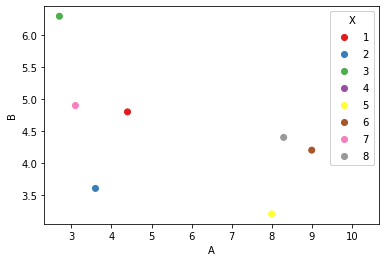

In [3]:
fig, axs = plt.subplots()
scatter = axs.scatter(A,B,c=C,cmap='Set1')
legend = axs.legend(*scatter.legend_elements(),loc="upper right", title="X")
axs.set_xlabel('A')
axs.set_ylabel('B')
axs.add_artist(legend)
plt.show()

2. Рассчитать ядерную матрицу

In [4]:
from scipy.spatial.distance import squareform, pdist
K=squareform(pdist(matrix))**2
K

array([[ 0.  ,  2.08,  5.14, 34.82, 15.52, 21.52,  1.7 , 15.37],
       [ 2.08,  0.  ,  8.1 , 46.58, 19.52, 29.52,  1.94, 22.73],
       [ 5.14,  8.1 ,  0.  , 59.72, 37.7 , 44.1 ,  2.12, 34.97],
       [34.82, 46.58, 59.72,  0.  ,  8.18,  2.18, 51.84,  4.25],
       [15.52, 19.52, 37.7 ,  8.18,  0.  ,  2.  , 26.9 ,  1.53],
       [21.52, 29.52, 44.1 ,  2.18,  2.  ,  0.  , 35.3 ,  0.53],
       [ 1.7 ,  1.94,  2.12, 51.84, 26.9 , 35.3 ,  0.  , 27.29],
       [15.37, 22.73, 34.97,  4.25,  1.53,  0.53, 27.29,  0.  ]])

## Задание 2
Рассмотрим данные в виде матрицы **D**:

| ***X<sub>1</sub>*** | ***X<sub>2</sub>*** |
| :-----------------: | :-----------------: |
|         -46         |         -19         |
|         -72         |         132         |
|         -27         |         73         |
|         3         |         64         |
|         -50         |         145         |
|         -37         |         202         |
|         -49         |         9         |
|         -47         |         37         |

1. Построить диаграмму рассеяния (оси подписать, пронумеровать точки)

In [5]:

X1=np.array([0,6,-6,-13,-13,23,1,-12])
X2=np.array([33,82,85,35,-62,49,22,0])

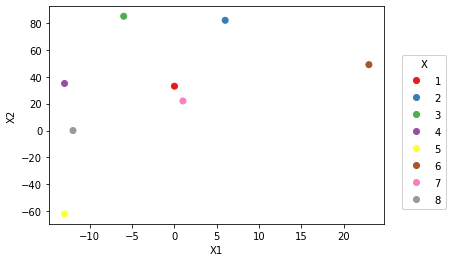

In [6]:
fig, axs = plt.subplots()
scatter = axs.scatter(X1,X2,c=C,cmap='Set1')
legend = axs.legend(*scatter.legend_elements(), title="X",bbox_to_anchor=(1.2, 0.8))
axs.set_xlabel('X1')
axs.set_ylabel('X2')
axs.add_artist(legend)
plt.show()


2. Рассчитайте среднее **μ** для матрицы **D**, ковариационную матрицу **Σ** для матрицы **D** и ковариационную матрицу **Σ<sub>c</sub>**  для центрированной матрицы **D**

In [7]:
X = np.vstack((X1,X2))
Xcentered = (X[0] - X1.mean(), X[1] - X2.mean())
m = (X1.mean(), X2.mean())
print(Xcentered)
print('Mean vector: ', m)

(array([  1.75,   7.75,  -4.25, -11.25, -11.25,  24.75,   2.75, -10.25]), array([  2.5,  51.5,  54.5,   4.5, -92.5,  18.5,  -8.5, -30.5]))
Mean vector:  (-1.75, 30.5)


In [8]:
Σ = np.cov(X)
print('Σ ',Σ)
Σc=np.cov(Xcentered)
print('\nΣc ',Σc)

Σ  [[ 151.35714286  272.71428571]
 [ 272.71428571 2221.42857143]]

Σc  [[ 151.35714286  272.71428571]
 [ 272.71428571 2221.42857143]]



3. Рассчитайте собственные числа и собственные вектора для матрицы **Σ<sub>c</sub>**

In [9]:
from numpy import linalg as LA
w,v = LA.eig(Σc)
print('Собственные числа ',w)
print('Собственные векторы ',v)

Собственные числа  [ 116.03216491 2256.75354938]
Собственные векторы  [[-0.99171496 -0.12845792]
 [ 0.12845792 -0.99171496]]


4. Выведите индекс (порядковый номер), соответствующий первой главной компоненте

In [10]:
print('Индекс первого главного компонента: ', np.argmax(w))

Индекс первого главного компонента:  1


    Т.е. 2 порядковый номер, так как большее собственное число представляет величину дисперсии, соответствующую первой главной оси.

5. Рассчитайте первый главный компонент. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)

In [11]:
Xnew = np.dot(-v[:,1],Xcentered)
print(Xnew)

[  2.70408876  52.06886934  53.50251922   3.01756576 -93.17878544
  21.52606022  -8.07631789 -31.56399996]


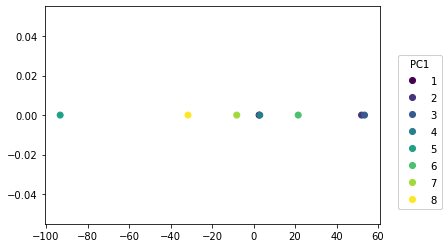

In [12]:
y=[0]*8
fig, axs = plt.subplots()
scatter = axs.scatter(Xnew,y,c=C)
legend = axs.legend(*scatter.legend_elements(), title="PC1",bbox_to_anchor=(1.2, 0.8))
axs.add_artist(legend)
plt.show()

6. Используя PCA из библиотеки sklearn, получите первую главную компоненту для матрицы **D**. Постройте точечный график полученного вектора (пронумеровать точки)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(X))
print('PC1:\n',XPCAreduced)

PC1:
 [[ -2.70408876]
 [-52.06886934]
 [-53.50251922]
 [ -3.01756576]
 [ 93.17878544]
 [-21.52606022]
 [  8.07631789]
 [ 31.56399996]]


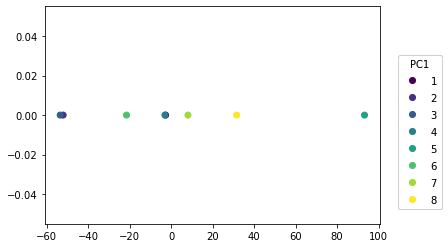

In [14]:
fig, axs = plt.subplots()
scatter = axs.scatter(XPCAreduced,y,c=C)
legend = axs.legend(*scatter.legend_elements(), title="PC1",bbox_to_anchor=(1.2, 0.8))
axs.add_artist(legend)
plt.show()

7. Визуально сравните графики, полученные в пунктах **5** и **6**. Убедитесь в корректности выполнения преобразований. Сохранен ли порядок точек? 

    Порядок точен сохранен, значения совпадают, преобразования выполнены корректно

Выведите название оси графика из пункта 1, проекция данных на которую сравнима с результатами PCA преобразований

In [15]:
print('Дисперсия X1 =', np.var(X1))
print('Дисперсия X2 =', np.var(X2))
print('Дисперсия PC1 =', np.var(XPCAreduced))

Дисперсия X1 = 132.4375
Дисперсия X2 = 1943.75
Дисперсия PC1 = 1974.6593557047267


Проекция данных на ось <b>X2</b> сравнима с результатами PCA преобразований.

8. **μ** и **Σ** сверху задают нормальное распределение, из которого были сгенерированы точки. Постройте диаграмму рассеяния, которая позволит определить ориентацию / размеры облака точек, полученного с помощью 2-мерной функции плотности вероятности. 


12.302729081677075
47.13203338949606


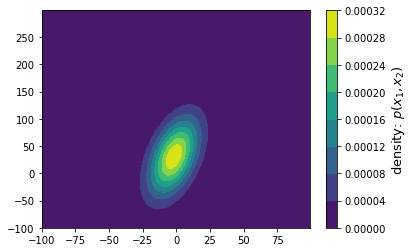

In [25]:
s1 = math.sqrt(Σ[0,0])
print(s1)
s2 =  math.sqrt(Σ[1,1])
print(s2)
x, y = np.mgrid[-100:100, -100:300]
pos = np.dstack((x, y))
rv = sts.multivariate_normal(m, Σ)
fig = plt.figure()
ax = fig.add_subplot()
cset= ax.contourf(x, y, rv.pdf(pos))
cbar = plt.colorbar(cset)
cbar.ax.set_ylabel('density: $p(x_1, x_2)$', fontsize=13)
plt.show()

 На отдельном линейном графике постройте графики функций плотностей вероятности отдельных компонентов 2-мерного нормального распределения

-1.75
30.5
[0.00036023 0.00043127 0.00051442 0.00061135 0.00072389 0.000854
 0.0010038  0.00117555 0.00137163 0.00159456 0.00184693 0.00213139
 0.00245064 0.00280739 0.00320428 0.00364387 0.00412857 0.00466059
 0.00524189 0.00587407 0.00655836 0.00729552 0.00808578 0.00892878
 0.00982353 0.01076832 0.01176069 0.01279742 0.01387449 0.01498705
 0.01612948 0.01729534 0.01847749 0.01966805 0.02085858 0.02204006
 0.02320308 0.02433791 0.02543465 0.02648335 0.0274742  0.02839761
 0.02924445 0.03000612 0.03067476 0.03124332 0.03170575 0.03205705
 0.03229342 0.03241225 0.03241225 0.03229342 0.03205705 0.03170575
 0.03124332 0.03067476 0.03000612 0.02924445 0.02839761 0.0274742
 0.02648335 0.02543465 0.02433791 0.02320308 0.02204006 0.02085858
 0.01966805 0.01847749 0.01729534 0.01612948 0.01498705 0.01387449
 0.01279742 0.01176069 0.01076832 0.00982353 0.00892878 0.00808578
 0.00729552 0.00655836 0.00587407 0.00524189 0.00466059 0.00412857
 0.00364387 0.00320428 0.00280739 0.00245064 0.0021313

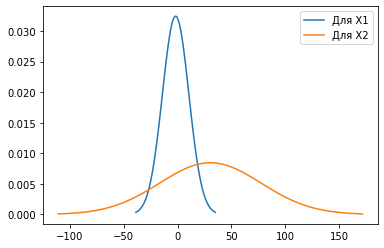

In [27]:
x1 = np.linspace(m[0] - 3*s1, m[0] + 3*s1, 100)
print(m[0])
x2 = np.linspace(m[1] - 3*s2, m[1] + 3*s2, 100)
print(m[1])
fx1 = sts.norm.pdf(x1,m[0],s1)
fx2 = sts.norm.pdf(x2,m[1],s2)
plt.plot(x1, fx1,label= 'Для X1')
plt.plot(x2, fx2,label= 'Для X2')
plt.legend()
print(fx1)
print(fx2)

### Задание 3

1. Для данных и ядра из первого задания найдите первую главную компоненту при нелинейном преобразовании для заданного ядра. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)

In [54]:
N = K.shape[0]
one_n = np.ones((N,N)) / N
KCentered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n) 
print(KCentered)
print("----------------------------------------------")
eig_vals, eig_vecs = LA.eig(KCentered)
print(eig_vals)
print("----------------------------------------------")
eig_vals, eig_vecs = eig_vals[::-1], eig_vecs[:, ::-1] 
eig_vecs = np.vstack([eig_vecs[:, i] for i in range(1)])   
my_kpca = np.dot(eig_vecs,KCentered).real
print('PC1:\n',my_kpca)

[[ -6.4390625  -8.6490625 -13.2615625  14.4534375   7.1809375  10.2059375
  -11.1065625   7.6159375]
 [ -8.6490625 -15.0190625 -14.5915625  21.9234375   6.8909375  13.9159375
  -15.1565625  10.6859375]
 [-13.2615625 -14.5915625 -30.3640625  27.3909375  17.3984375  20.8234375
  -22.6490625  15.2534375]
 [ 14.4534375  21.9234375  27.3909375 -34.2940625 -14.0865625 -23.0615625
   25.1059375 -17.4315625]
 [  7.1809375   6.8909375  17.3984375 -14.0865625 -10.2390625 -11.2140625
   12.1934375  -8.1240625]
 [ 10.2059375  13.9159375  20.8234375 -23.0615625 -11.2140625 -16.1890625
   17.6184375 -12.0990625]
 [-11.1065625 -15.1565625 -22.6490625  25.1059375  12.1934375  17.6184375
  -19.1740625  13.1684375]
 [  7.6159375  10.6859375  15.2534375 -17.4315625  -8.1240625 -12.0990625
   13.1684375  -9.0690625]]
----------------------------------------------
[-1.30212169e+02+0.00000000e+00j -1.05753311e+01+0.00000000e+00j
 -7.70062376e-15+0.00000000e+00j -2.45830063e-15+2.37723166e-15j
 -2.45830063e-

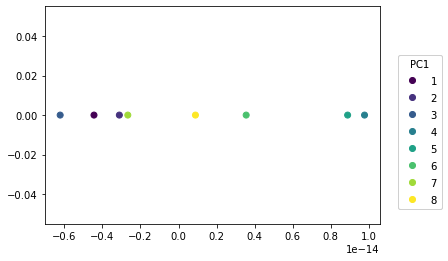

In [33]:
y=[0]*8
fig, axs = plt.subplots()
scatter = axs.scatter(my_kpca,y,c=C)
legend = axs.legend(*scatter.legend_elements(),bbox_to_anchor=(1.2, 0.8), title="PC1",)
axs.add_artist(legend)
plt.show()

2. Используя KernelPCA из библиотеки sklearn с ядром Гаусса и гаммой = 1, получите первую главную компоненту для данных из первого задания. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)

In [20]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', n_components=1, gamma =1)
kpca_transform = kpca.fit_transform(matrix)
print('PC1:\n',kpca_transform)

PC1:
 [[-0.41866114]
 [-0.38818492]
 [-0.27293928]
 [-0.00748316]
 [ 0.26952468]
 [ 0.63508423]
 [-0.47266214]
 [ 0.65532173]]


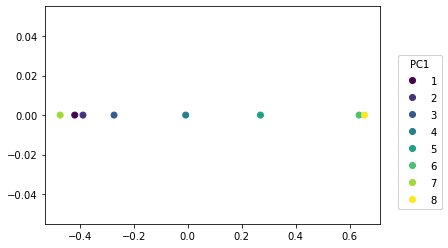

In [21]:
fig, axs = plt.subplots()
scatter = axs.scatter(kpca_transform,y,c=C)
legend = axs.legend(*scatter.legend_elements(),bbox_to_anchor=(1.2, 0.8), title="PC1")
axs.add_artist(legend)
plt.show()

3. Визуально сравните графики, полученные в пунктах **1** и **2**. Определите, использование какого ядра (из первого задания или ядра Гаусса) позволяет, на ваш взгляд, лучше визуально выделить принадлежность точки к одному из двух кластеров

    Использование Гауссово ядра позволяет визуально лучше оценить принадлежность точки к определенному кластеру, чем ядро заданное в 1 задании